[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyCirclize/blob/main/docs/phylogenetic_tree.ipynb)

In [1]:
# %pip install pycirclizely

## 1. Simple Tree

User can plot the phylogenetic tree with `Circos.initialize_from_tree()` or `track.tree()` methods.
Both methods return a **TreeViz** instance, which can be manipulated to set phylogenetic tree
annotations such as marker and highlight.

### 1-1. Default Style

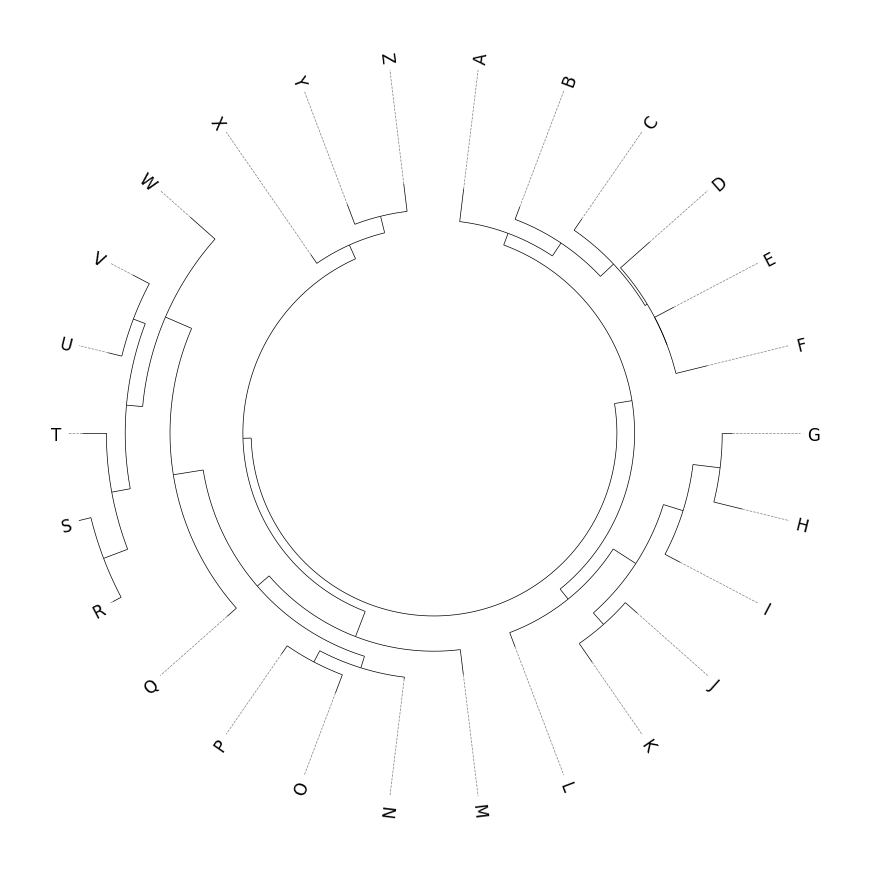

In [2]:
from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

tree_file = load_example_tree_file("alphabet.nwk")
circos, tv = Circos.initialize_from_tree(tree_file)
fig = circos.plotfig()

### 1-2. Change Style 1

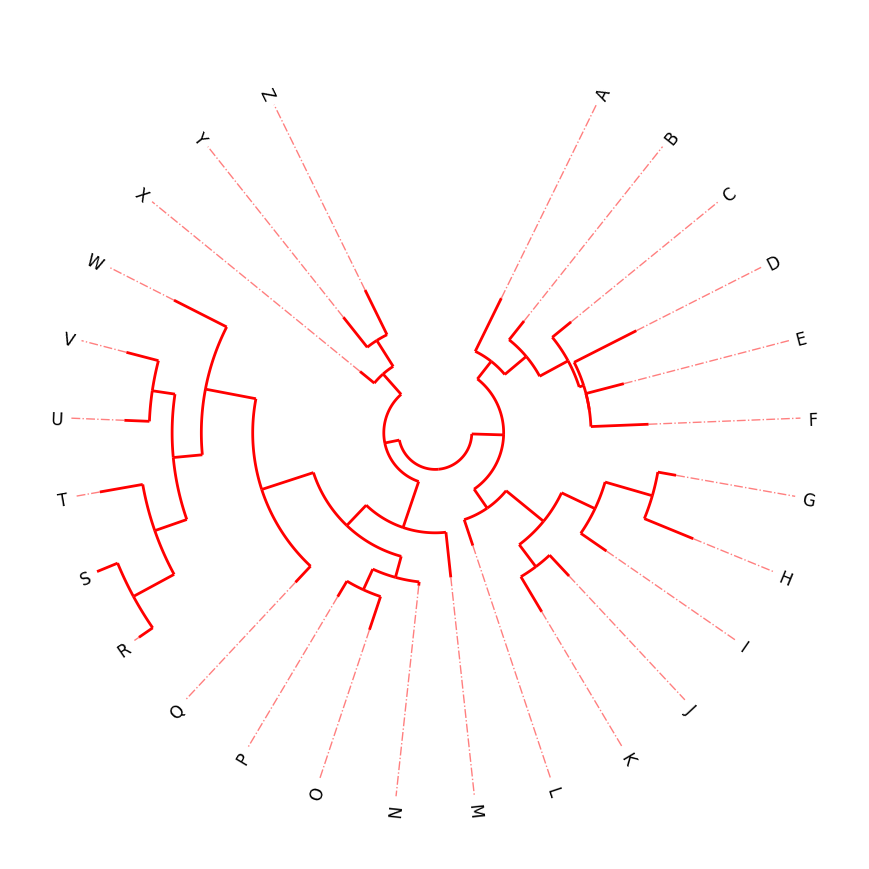

In [3]:
from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

tree_file = load_example_tree_file("alphabet.nwk")
circos, tv = Circos.initialize_from_tree(
    tree_file,
    start=20,  # Default: 0
    end=340,  # Default: 360
    r_lim=(10, 100),  # Default: (50, 100)
    line_kws=dict(color="red", lw=2),  # Default: {}, Change color & linewidth
    align_line_kws=dict(
        ls="dashdot", lw=1
    ),  # Default: {}, Change linestyle & linewidth
)
fig = circos.plotfig()

### 1-3. Change Style 2

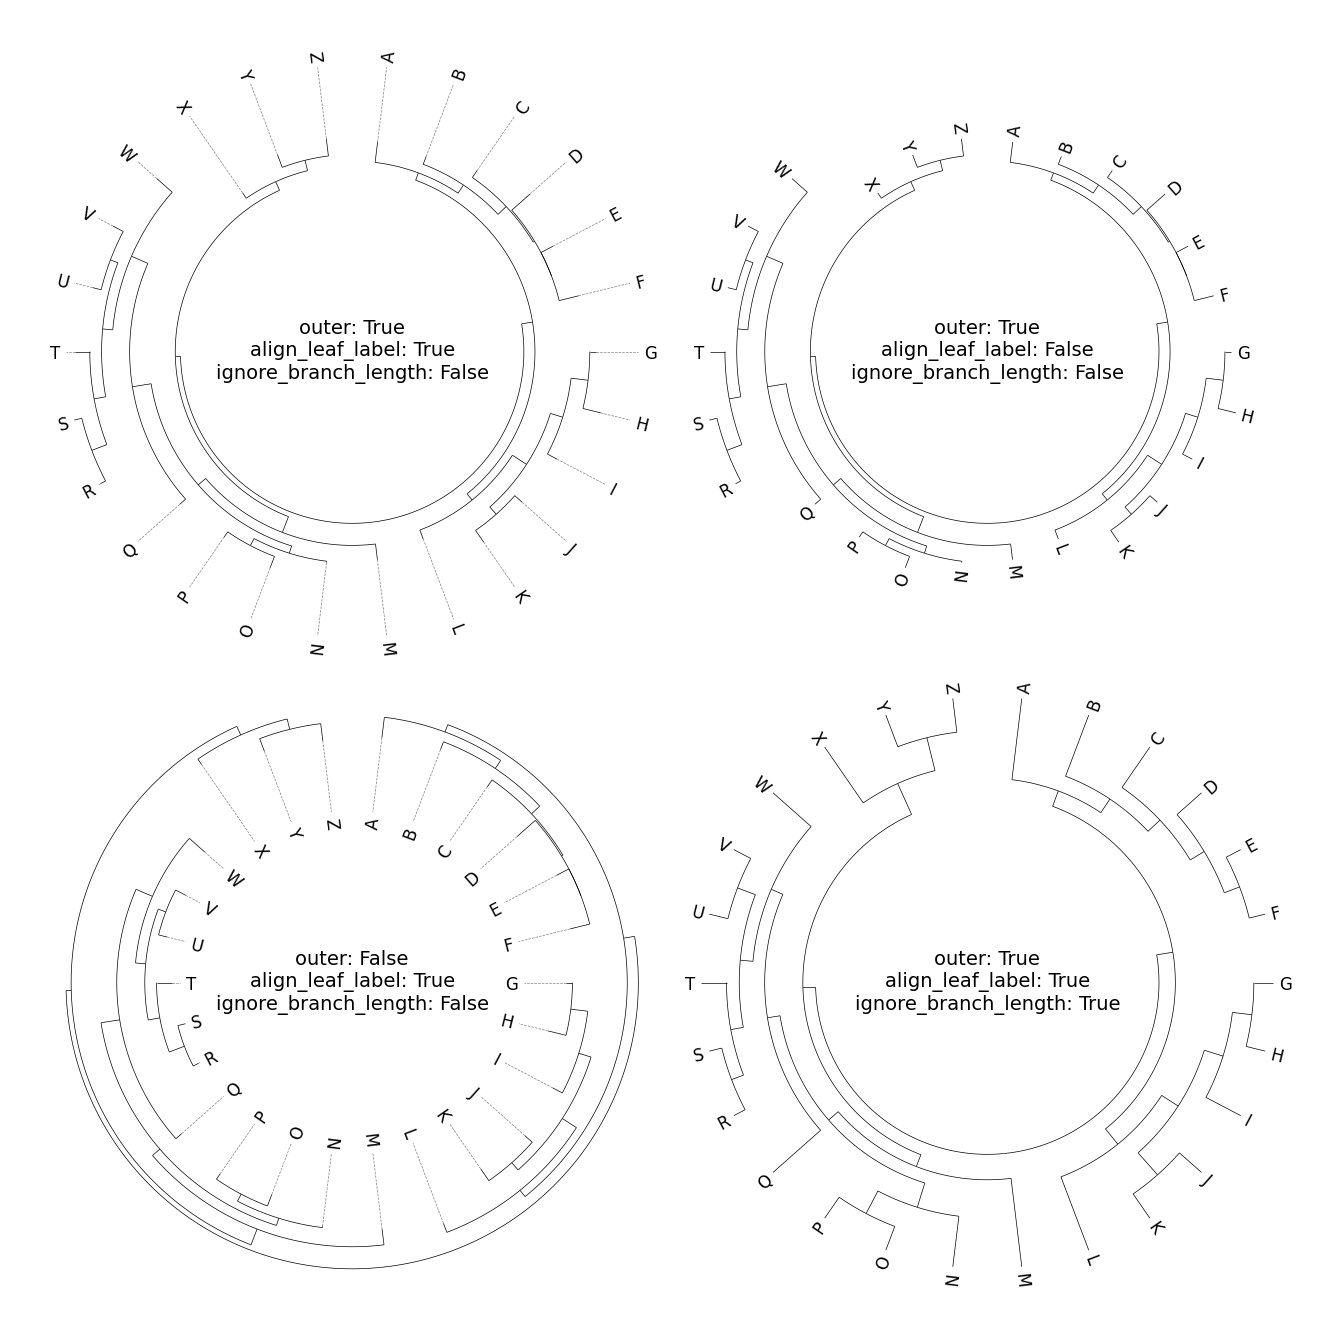

In [4]:
import matplotlib.pyplot as plt

from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

# Create 2x2 polar subplots
fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(wspace=0.05, hspace=0.05)
ax_list = fig.subplots(2, 2, subplot_kw=dict(polar=True)).flatten()

# Define 4 types kwargs for `Circos.initialize_from_tree()` method
kwargs_list = [
    dict(outer=True, align_leaf_label=True, ignore_branch_length=False),
    dict(outer=True, align_leaf_label=False, ignore_branch_length=False),
    dict(outer=False, align_leaf_label=True, ignore_branch_length=False),
    dict(outer=True, align_leaf_label=True, ignore_branch_length=True),
]

# Plot trees with different kwargs
tree_file = load_example_tree_file("alphabet.nwk")
for ax, kwargs in zip(ax_list, kwargs_list):
    circos, tv = Circos.initialize_from_tree(tree_file, r_lim=(60, 100), **kwargs)
    kwargs_text = "\n".join([f"{k}: {v}" for k, v in kwargs.items()])
    circos.text(kwargs_text, size=14)
    circos.plotfig(ax=ax)

### 1-4. Change Style 3

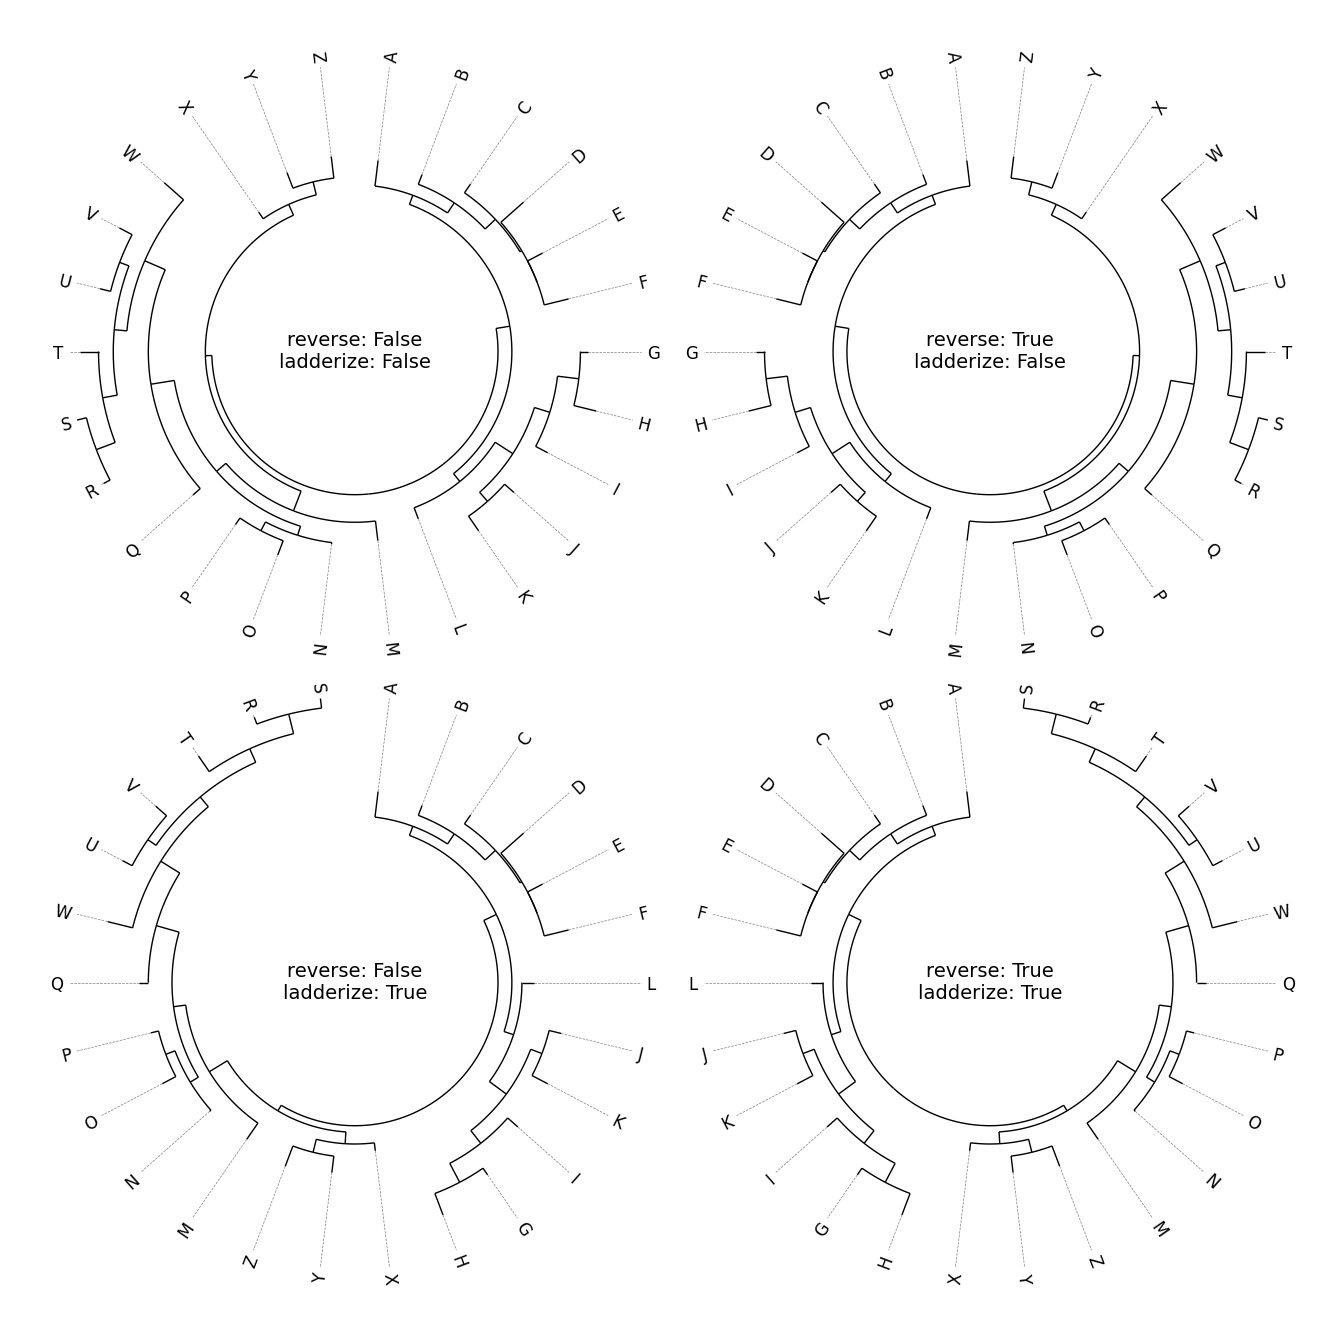

In [5]:
import matplotlib.pyplot as plt

from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

# Create 2x2 polar subplots
fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(wspace=0.05, hspace=0.05)
ax_list = fig.subplots(2, 2, subplot_kw=dict(polar=True)).flatten()

# Define 4 types kwargs for `Circos.initialize_from_tree()` method
kwargs_list = [
    dict(reverse=False, ladderize=False),
    dict(reverse=True, ladderize=False),
    dict(reverse=False, ladderize=True),
    dict(reverse=True, ladderize=True),
]

# Plot trees with different kwargs
tree_file = load_example_tree_file("alphabet.nwk")
for ax, kwargs in zip(ax_list, kwargs_list):
    circos, tv = Circos.initialize_from_tree(tree_file, line_kws=dict(lw=1), **kwargs)
    kwargs_text = "\n".join([f"{k}: {v}" for k, v in kwargs.items()])
    circos.text(kwargs_text, size=14)
    circos.plotfig(ax=ax)

### 1-5. Set Label Properties

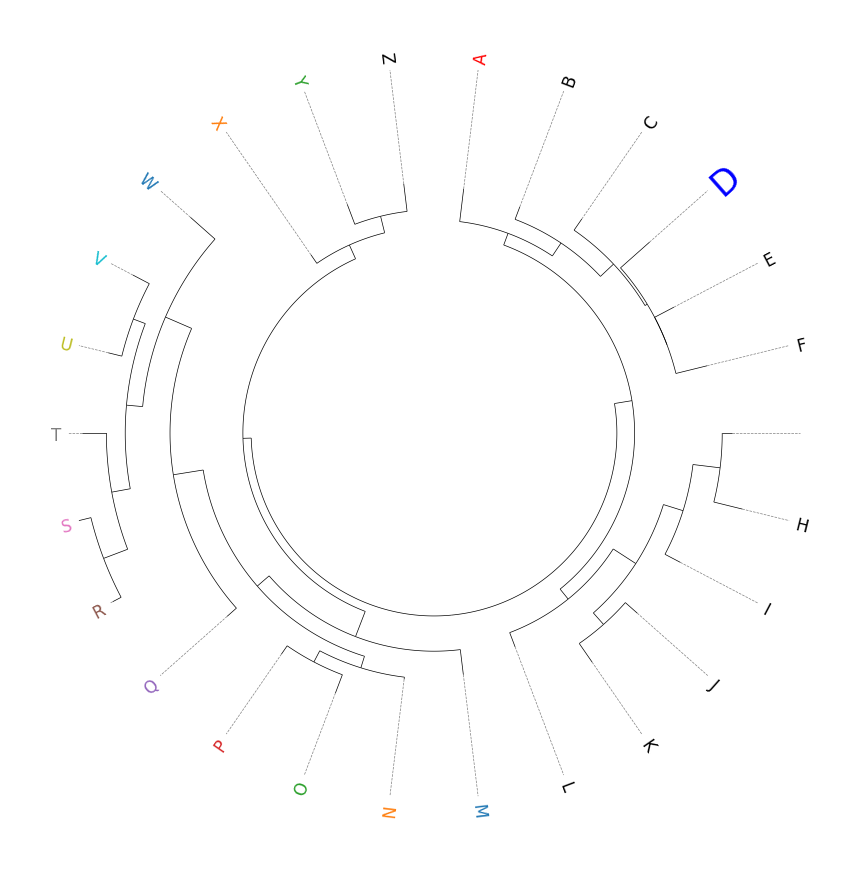

In [6]:
from pycirclizely import Circos
from pycirclizely.utils import ColorCycler, load_example_tree_file

tree_file = load_example_tree_file("alphabet.nwk")
circos, tv = Circos.initialize_from_tree(tree_file)

# Change label color
tv.set_node_label_props("A", color="red")
# Change label color & size
tv.set_node_label_props("D", color="blue", size=25)
# Hide label
tv.set_node_label_props("G", size=0)
# Change label colors
ColorCycler.set_cmap("tab10")
for name in list("MNOPQRSTUVWXY"):
    tv.set_node_label_props(name, color=ColorCycler())

fig = circos.plotfig()

### 1-6. Set Line Properties

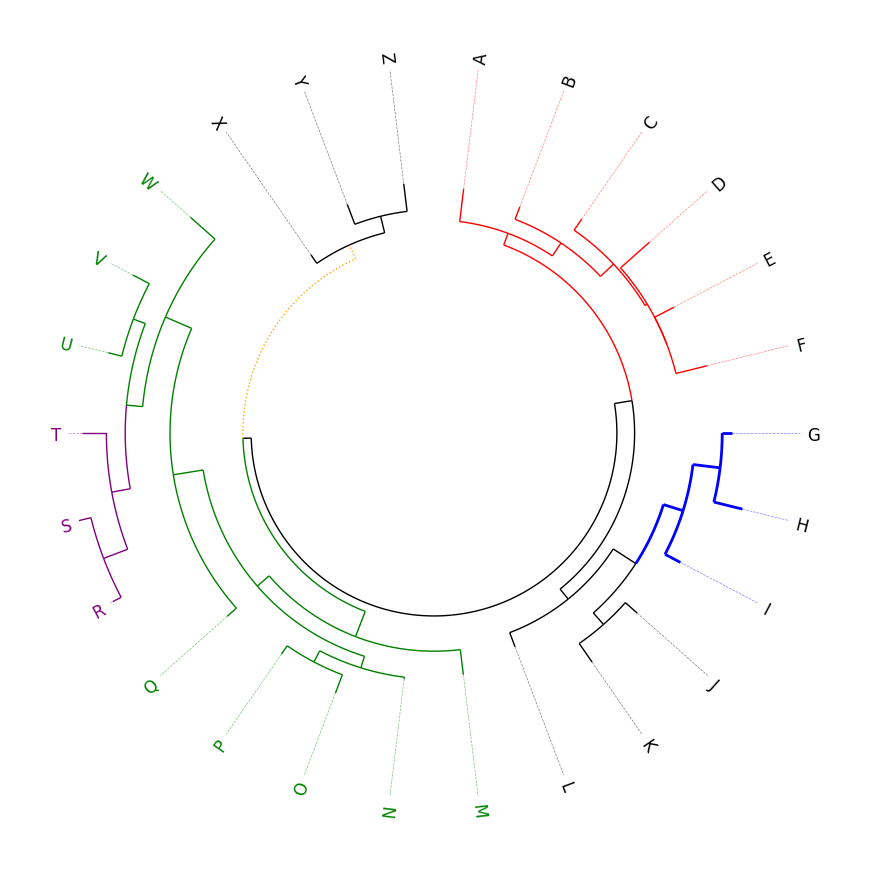

In [7]:
from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

tree_file = load_example_tree_file("alphabet.nwk")
circos, tv = Circos.initialize_from_tree(tree_file, line_kws=dict(lw=1.0))

# Change line color on [A,B,C,D,E,F] MRCA(Most Recent Common Ancestor) node and its descendent nodes
tv.set_node_line_props(["A", "B", "C", "D", "E", "F"], color="red")
# Change line color & width on [G,I] MRCA node and its descendent nodes
tv.set_node_line_props(["G", "I"], color="blue", lw=2.0)
# Change line color & label color on [M,W] MRCA node and its descendent nodes
tv.set_node_line_props(["M", "W"], color="green", apply_label_color=True)
# Change line color & label color on [R,T] MRCA node and its descendent nodes
tv.set_node_line_props(["R", "T"], color="purple", apply_label_color=True)
# Change line color & style [X,Y] MRCA node
tv.set_node_line_props(["X", "Y"], color="orange", descendent=False, ls="dotted")

fig = circos.plotfig()

### 1-7. Plot Marker

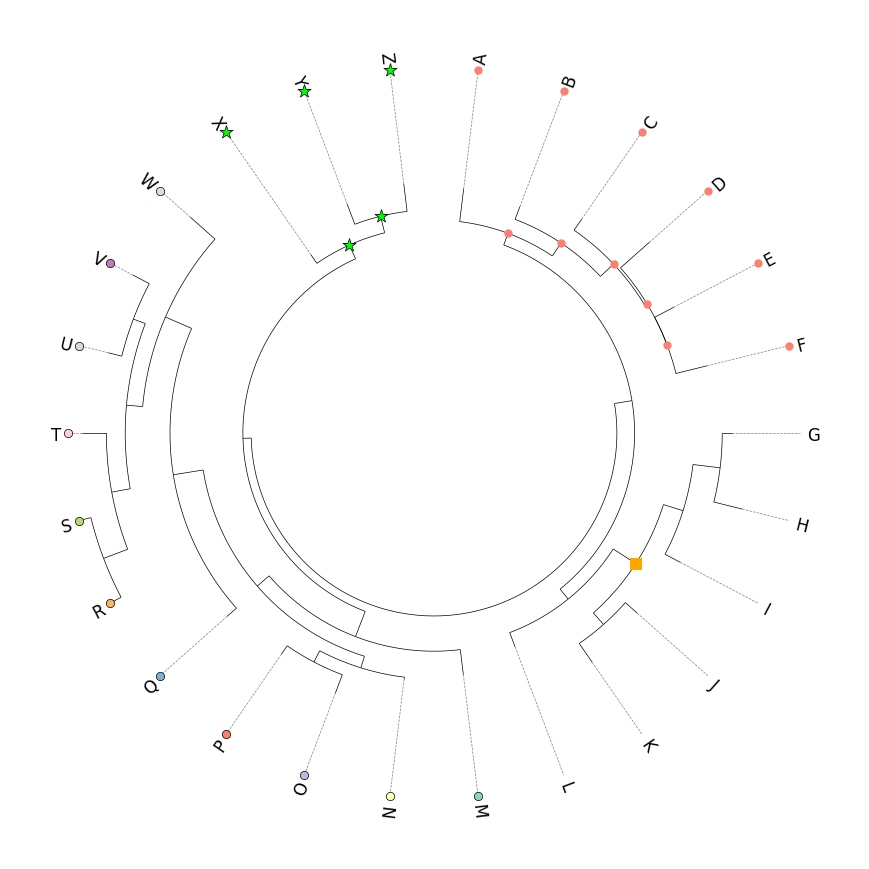

In [8]:
from pycirclizely import Circos
from pycirclizely.utils import ColorCycler, load_example_tree_file

tree_file = load_example_tree_file("alphabet.nwk")
circos, tv = Circos.initialize_from_tree(tree_file)

# Plot markers on [A,B,C,D,E,F] MRCA(Most Recent Common Ancestor) node and its descendent nodes
tv.marker(["A", "B", "C", "D", "E", "F"], color="salmon")
# Plot square marker on [G,K] MRCA node
tv.marker(["G", "K"], color="orange", marker="s", size=8, descendent=False)
# Plot star markers on [X,Y] MRCA node and its descendent nodes
tv.marker(["X", "Y"], color="lime", marker="*", size=10, ec="black", lw=0.5)
# Plot colored markers on M,N,O,P,Q,R,S,T,U,V,W leaf nodes
ColorCycler.set_cmap("Set3")
for leaf_name in list("MNOPQRSTUVW"):
    tv.marker(leaf_name, color=ColorCycler(), ec="black", lw=0.5)

fig = circos.plotfig()

### 1-8. Plot Highlight

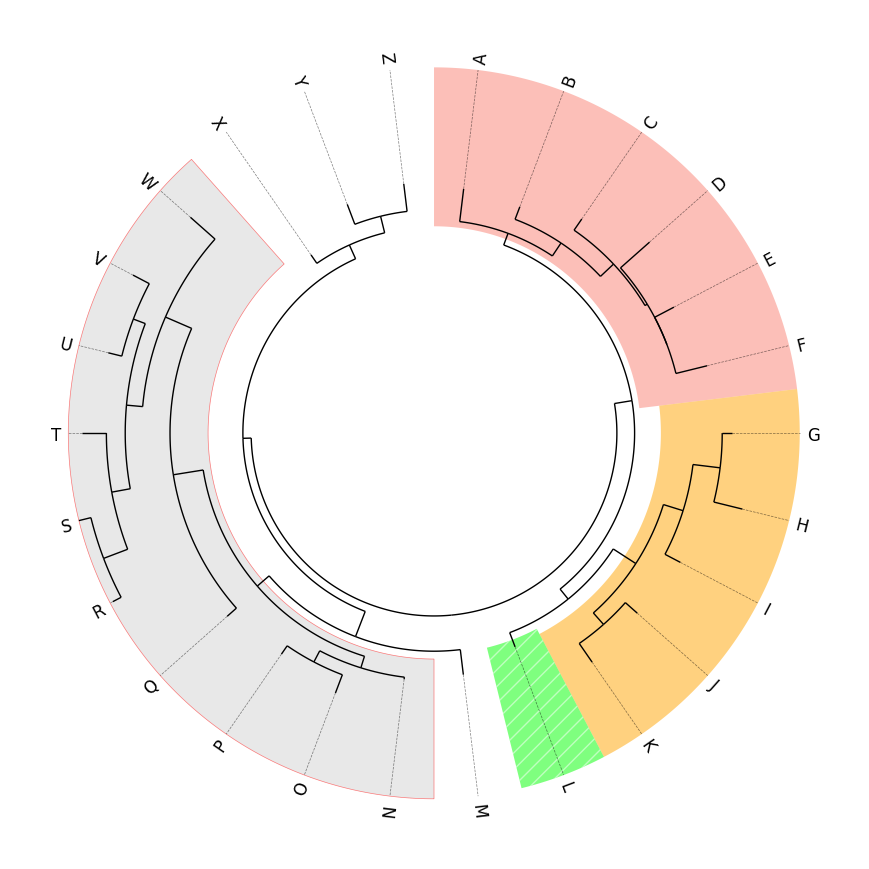

In [9]:
from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

tree_file = load_example_tree_file("alphabet.nwk")
circos, tv = Circos.initialize_from_tree(tree_file, line_kws=dict(lw=1))

# Plot highlight on [A,B,C,D,E,F] MRCA(Most Recent Common Ancestor) node
tv.highlight(["A", "B", "C", "D", "E", "F"], color="salmon")
# Plot highlight on [G,K] MRCA node
tv.highlight(["G", "K"], color="orange")
# Plot highlight on L node with '//' hatch pattern
tv.highlight("L", color="lime", hatch="//", ec="white")
# Plot highlight on [N,W] MRCA node with edge line
tv.highlight(["N", "W"], color="lightgrey", alpha=0.5, ec="red", lw=0.5)

fig = circos.plotfig()

### 1-9. With Heatmap

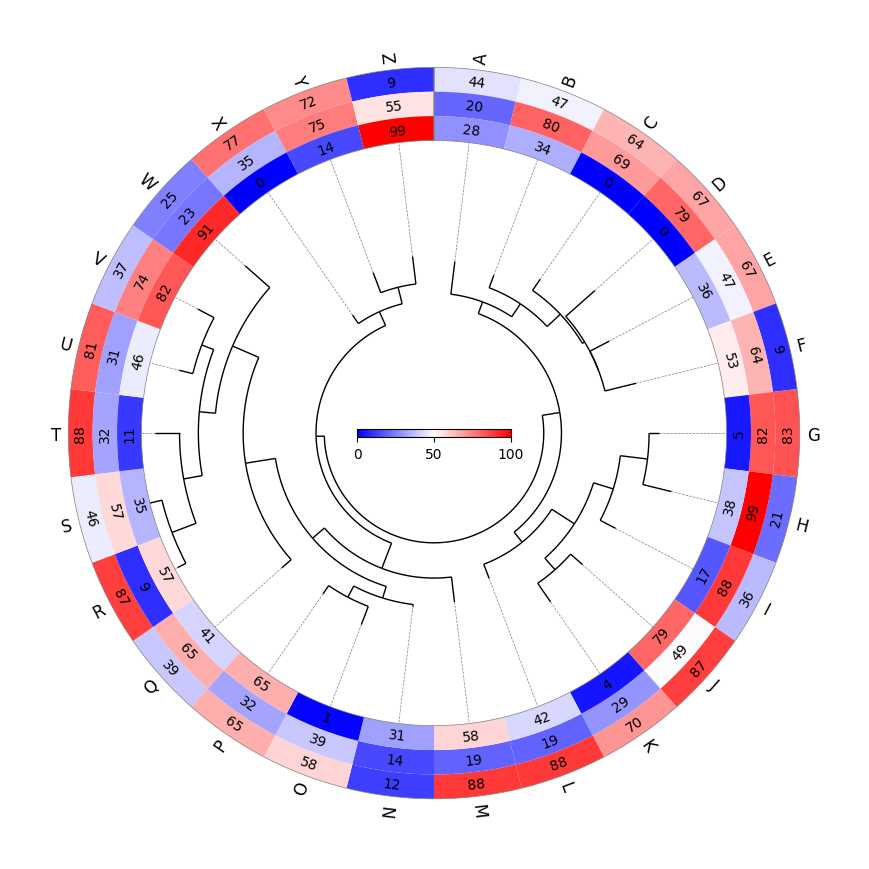

In [10]:
import numpy as np

from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

np.random.seed(0)

tree_file = load_example_tree_file("alphabet.nwk")
circos, tv = Circos.initialize_from_tree(
    tree_file,
    r_lim=(30, 80),
    # Set large margin to insert heatmap track between tree and labels
    leaf_label_rmargin=22,
    line_kws=dict(lw=1),
)

# Plot heatmap
sector = tv.track.parent_sector
track = sector.add_track((80, 100))
track.axis(ec="grey")
vmin, vmax, cmap = 0, 100, "bwr"
data = np.random.randint(vmin, vmax + 1, (3, tv.leaf_num))
track.heatmap(data, cmap=cmap, show_value=True)

circos.colorbar(
    (0.4, 0.495, 0.2, 0.01), vmin=vmin, vmax=vmax, cmap=cmap, orientation="horizontal"
)

fig = circos.plotfig()

### 1-10. With Heatmap + Bar

   s1  s2  s3  count
A  44  20  28      6
B  47  80  34      5
C  64  69   0      5
D  67  79   0      7
E  67  47  36      5


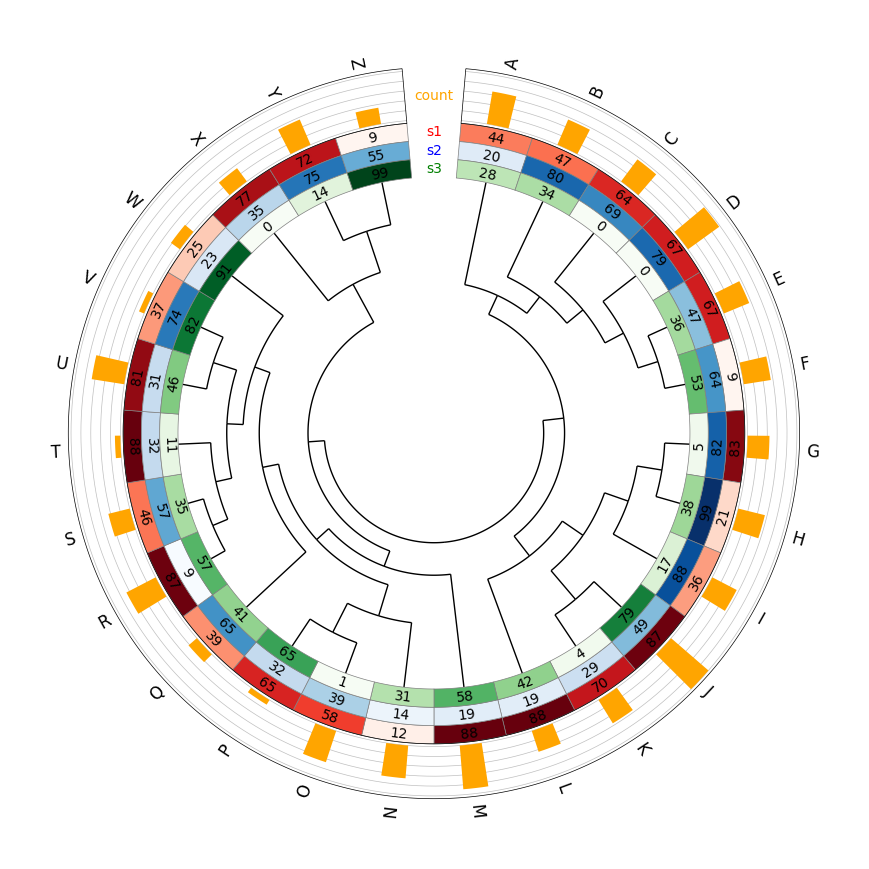

In [11]:
import numpy as np
import pandas as pd

from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

np.random.seed(0)

tree_file = load_example_tree_file("alphabet.nwk")
circos, tv = Circos.initialize_from_tree(
    tree_file,
    start=5,
    end=355,
    r_lim=(30, 70),
    # Set large margin to insert heatmap & bar track between tree and labels
    leaf_label_rmargin=32,
    ignore_branch_length=True,
    line_kws=dict(lw=1),
)

# Create example dataframe for heatmap & bar plot
df = pd.DataFrame(
    dict(
        s1=np.random.randint(0, 100, tv.leaf_num),
        s2=np.random.randint(0, 100, tv.leaf_num),
        s3=np.random.randint(0, 100, tv.leaf_num),
        count=np.random.randint(1, 10, tv.leaf_num),
    ),
    index=tv.leaf_labels,
)
print(df.head())

# Plot bar (from `count` column data)
sector = tv.track.parent_sector
bar_track = sector.add_track((85, 100), r_pad_ratio=0.1)
bar_track.axis()
bar_track.grid()
x = np.arange(0, tv.leaf_num) + 0.5
y = df["count"].to_numpy()
bar_track.bar(x, y, width=0.3, color="orange")

# Plot heatmaps (from `s1, s2, s3` column data)
track1 = sector.add_track((80, 85))
track1.heatmap(
    df["s1"].to_numpy(), cmap="Reds", show_value=True, rect_kws=dict(ec="grey", lw=0.5)
)
track2 = sector.add_track((75, 80))
track2.heatmap(
    df["s2"].to_numpy(), cmap="Blues", show_value=True, rect_kws=dict(ec="grey", lw=0.5)
)
track3 = sector.add_track((70, 75))
track3.heatmap(
    df["s3"].to_numpy(),
    cmap="Greens",
    show_value=True,
    rect_kws=dict(ec="grey", lw=0.5),
)

# Plot track labels
circos.text("count", r=bar_track.r_center, color="orange")
circos.text("s1", r=track1.r_center, color="red")
circos.text("s2", r=track2.r_center, color="blue")
circos.text("s3", r=track3.r_center, color="green")

fig = circos.plotfig()

## 2. Large Tree

Example mammalian phylogenetic tree data is obtained from [OrthoMaM](https://orthomam.mbb.cnrs.fr/).

### 2-1. Default Style

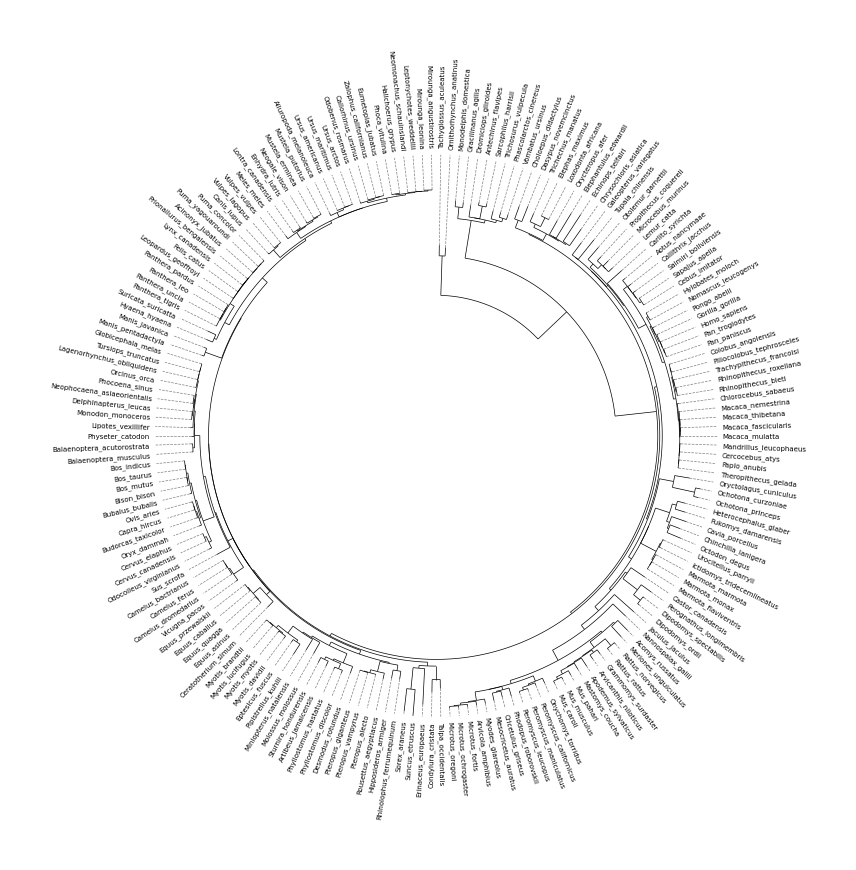

In [12]:
from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

tree_file = load_example_tree_file("large_example.nwk")
circos, tv = Circos.initialize_from_tree(tree_file, leaf_label_size=5)
fig = circos.plotfig()

### 2-2. Coloring Style

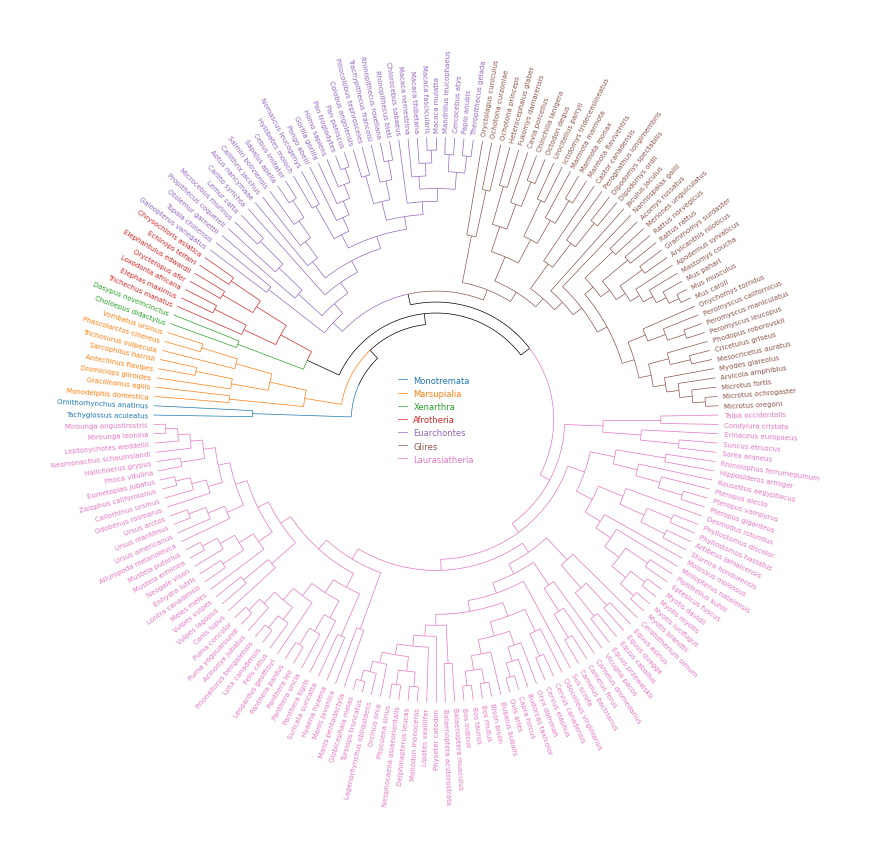

In [13]:
from matplotlib.lines import Line2D

from pycirclizely import Circos
from pycirclizely.utils import ColorCycler, load_example_tree_file

tree_file = load_example_tree_file("large_example.nwk")
circos, tv = Circos.initialize_from_tree(
    tree_file,
    start=-90,
    end=270,
    r_lim=(30, 100),
    leaf_label_size=5,
    ignore_branch_length=True,
    label_formatter=lambda t: t.replace("_", " "),
)

# Define group-species dict for tree annotation
# In this example, set minimum species list to specify group's MRCA node
group_name2species_list = dict(
    Monotremata=["Tachyglossus_aculeatus", "Ornithorhynchus_anatinus"],
    Marsupialia=["Monodelphis_domestica", "Vombatus_ursinus"],
    Xenarthra=["Choloepus_didactylus", "Dasypus_novemcinctus"],
    Afrotheria=["Trichechus_manatus", "Chrysochloris_asiatica"],
    Euarchontes=["Galeopterus_variegatus", "Theropithecus_gelada"],
    Glires=["Oryctolagus_cuniculus", "Microtus_oregoni"],
    Laurasiatheria=["Talpa_occidentalis", "Mirounga_leonina"],
)

# Set tree line color & label color
ColorCycler.set_cmap("tab10")
group_name2color = {name: ColorCycler() for name in group_name2species_list.keys()}
for group_name, species_list in group_name2species_list.items():
    color = group_name2color[group_name]
    tv.set_node_line_props(species_list, color=color, apply_label_color=True)

# Plot figure & set legend on center
fig = circos.plotfig()
_ = circos.ax.legend(
    handles=[Line2D([], [], label=n, color=c) for n, c in group_name2color.items()],
    labelcolor=group_name2color.values(),
    fontsize=6,
    loc="center",
    bbox_to_anchor=(0.5, 0.5),
)

### 2-3. With Heatmap

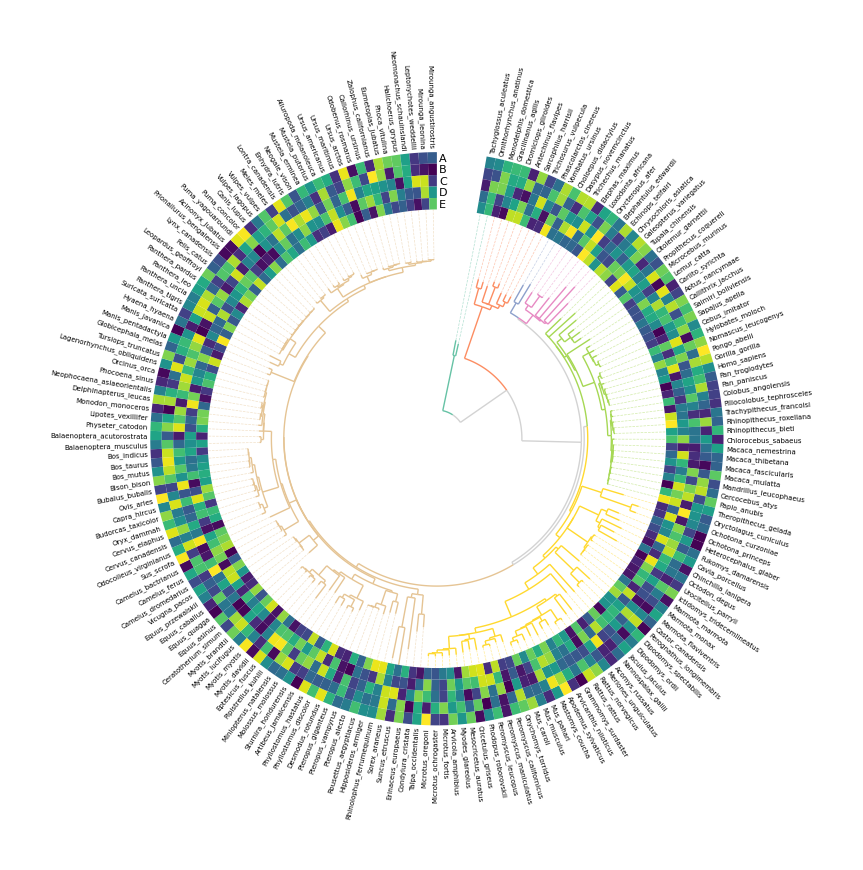

In [14]:
import numpy as np

from pycirclizely import Circos
from pycirclizely.utils import ColorCycler, load_example_tree_file

np.random.seed(0)

tree_file = load_example_tree_file("large_example.nwk")
circos, tv = Circos.initialize_from_tree(
    tree_file,
    start=-350,
    end=0,
    r_lim=(10, 80),
    leaf_label_size=5,
    leaf_label_rmargin=21,
    line_kws=dict(color="lightgrey", lw=1),
)

# Define group-species dict for tree annotation
# In this example, set minimum species list to specify group's MRCA node
group_name2species_list = dict(
    Monotremata=["Tachyglossus_aculeatus", "Ornithorhynchus_anatinus"],
    Marsupialia=["Monodelphis_domestica", "Vombatus_ursinus"],
    Xenarthra=["Choloepus_didactylus", "Dasypus_novemcinctus"],
    Afrotheria=["Trichechus_manatus", "Chrysochloris_asiatica"],
    Euarchontes=["Galeopterus_variegatus", "Theropithecus_gelada"],
    Glires=["Oryctolagus_cuniculus", "Microtus_oregoni"],
    Laurasiatheria=["Talpa_occidentalis", "Mirounga_leonina"],
)

# Set tree line color
ColorCycler.set_cmap("Set2")
for species_list in group_name2species_list.values():
    tv.set_node_line_props(species_list, color=ColorCycler())

# Plot heatmap
sector = circos.sectors[0]
heatmap_track = sector.add_track((80, 100))
matrix_data = np.random.randint(0, 100, (5, tv.leaf_num))
heatmap_track.heatmap(matrix_data, cmap="viridis")
heatmap_track.yticks([0.5, 1.5, 2.5, 3.5, 4.5], list("EDCBA"), vmax=5, tick_length=0)

fig = circos.plotfig()

### 2-4. With Complex Heatmap

                            A   B  C      D
Tachyglossus_aculeatus     44  21  0  False
Ornithorhynchus_anatinus   47  25  1   True
Monodelphis_domestica      64  80  1   True
Gracilinanus_agilis        67  60  1   True
Dromiciops_gliroides       67  61  1  False
...                        ..  .. ..    ...
Halichoerus_grypus         75  72  1   True
Neomonachus_schauinslandi  56  61  1   True
Leptonychotes_weddellii    16  13  0   True
Mirounga_leonina           24   5  1   True
Mirounga_angustirostris    29   0  0  False

[190 rows x 4 columns]


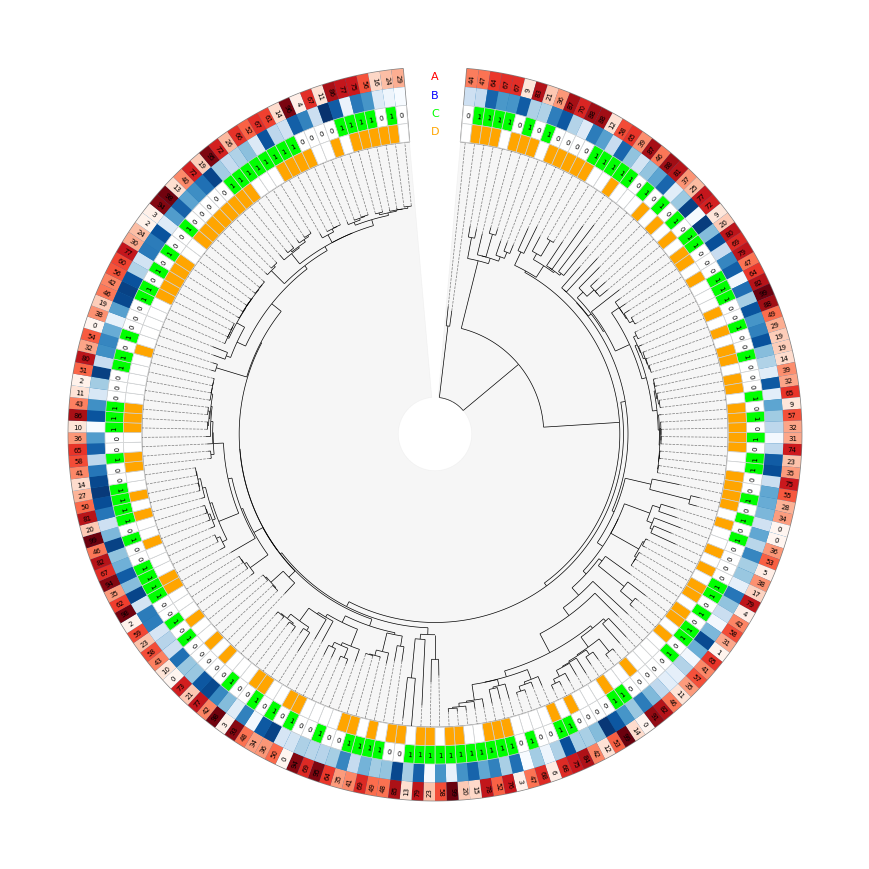

In [15]:
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from pycirclizely import Circos
from pycirclizely.utils import load_example_tree_file

np.random.seed(0)

tree_file = load_example_tree_file("large_example.nwk")
circos, tv = Circos.initialize_from_tree(
    tree_file,
    start=-355,
    end=-5,
    r_lim=(10, 80),
    leaf_label_size=0,
)
tv.track.axis(fc="lightgrey", ec="lightgrey", alpha=0.2)

# Create example dataframe for heatmap plot
heatmap_df = pd.DataFrame(
    dict(
        A=np.random.randint(0, 100, tv.leaf_num),
        B=np.random.randint(0, 100, tv.leaf_num),
        C=np.random.randint(0, 2, tv.leaf_num),
        D=np.random.randint(0, 2, tv.leaf_num).astype(bool),
    ),
    index=tv.leaf_labels,
)
print(heatmap_df)

# Plot heatmap with various style
sector = circos.sectors[0]
sector.rect(r_lim=(80, 100), ec="grey", lw=1)

heatmap_track1 = sector.add_track((95, 100))
heatmap_track1.heatmap(
    heatmap_df["A"].to_numpy(),
    cmap="Reds",
    vmin=0,
    vmax=100,
    show_value=True,
    text_kws=dict(size=5, orientation="vertical"),
)
circos.text("A", r=heatmap_track1.r_center, size=8, color="red")

heatmap_track2 = sector.add_track((90, 95))
heatmap_track2.heatmap(heatmap_df["B"].to_numpy(), cmap="Blues", vmin=0, vmax=100)
circos.text("B", r=heatmap_track2.r_center, size=8, color="blue")

heatmap_track3 = sector.add_track((85, 90))
lime_cmap = LinearSegmentedColormap.from_list("limecmap", ["white", "lime"])
heatmap_track3.heatmap(
    heatmap_df["C"].to_numpy(),
    cmap=lime_cmap,
    vmin=0,
    vmax=1,
    show_value=True,
    text_kws=dict(size=5),
    rect_kws=dict(ec="lightgrey", lw=0.5),
)
circos.text("C", r=heatmap_track3.r_center, size=8, color="lime")

heatmap_track4 = sector.add_track((80, 85))
orange_cmap = LinearSegmentedColormap.from_list("orangecmap", ["white", "orange"])
heatmap_track4.heatmap(
    heatmap_df["D"].to_numpy(),
    cmap=orange_cmap,
    vmin=0,
    vmax=1,
    rect_kws=dict(ec="lightgrey", lw=0.5),
)
circos.text("D", r=heatmap_track4.r_center, size=8, color="orange")

fig = circos.plotfig()

## 3. Multiple Trees

### 3-1. Default Style

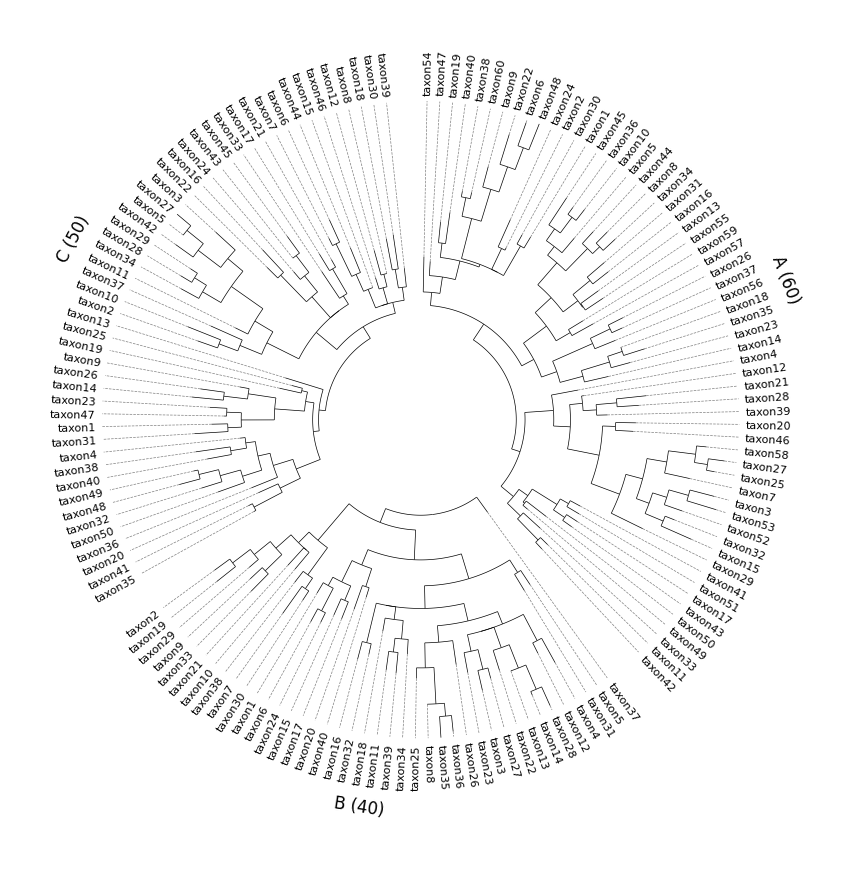

In [16]:
import random

from Bio.Phylo.BaseTree import Tree

from pycirclizely import Circos

random.seed(0)

# Create 3 randomized trees
tree_size_list = [60, 40, 50]
trees = [Tree.randomized(size, branch_stdev=0.5) for size in tree_size_list]

# Initialize circos sector with 3 randomized tree size
sectors = {name: tree.count_terminals() for name, tree in zip(list("ABC"), trees)}
circos = Circos(sectors, space=5)

for sector, tree in zip(circos.sectors, trees):
    sector.text(f"{sector.name} ({sector.size})", r=120, size=12)
    track = sector.add_track((30, 100))
    track.tree(tree, leaf_label_size=8)

fig = circos.plotfig()

### 3-2. With Heatmap + Bar

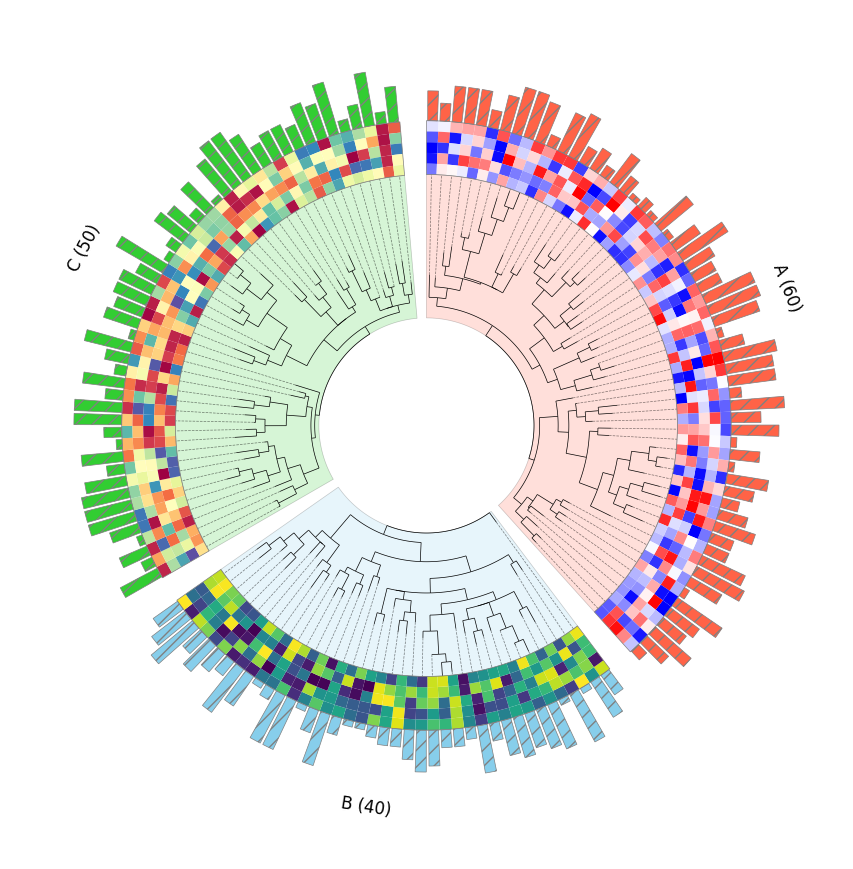

In [17]:
import random

import numpy as np
from Bio.Phylo.BaseTree import Tree

from pycirclizely import Circos

random.seed(0)
np.random.seed(0)

# Create 3 randomized trees
tree_size_list = [60, 40, 50]
trees = [Tree.randomized(size, branch_stdev=0.5) for size in tree_size_list]

# Initialize circos sector with 3 randomized tree size
sectors = {name: tree.count_terminals() for name, tree in zip(list("ABC"), trees)}
circos = Circos(sectors, space=5)

colors = ["tomato", "skyblue", "limegreen"]
cmaps = ["bwr", "viridis", "Spectral"]
for sector, tree, color, cmap in zip(circos.sectors, trees, colors, cmaps):
    sector.text(f"{sector.name} ({sector.size})", size=12)
    # Plot randomized tree
    tree_track = sector.add_track((30, 70))
    tree_track.axis(fc=color, alpha=0.2)
    tree_track.tree(tree, leaf_label_size=0)
    # Plot randomized heatmap
    heatmap_track = sector.add_track((70, 85))
    matrix_data = np.random.randint(0, 100, (5, int(sector.size)))
    heatmap_track.axis(ec="grey")
    heatmap_track.heatmap(matrix_data, cmap=cmap)
    # Plot randomized bar
    bar_track = sector.add_track((85, 100))
    x = np.arange(0, int(sector.size)) + 0.5
    height = np.random.randint(1, 10, int(sector.size))
    bar_track.bar(x, height, fc=color, ec="grey", lw=0.5, hatch="//")

fig = circos.plotfig()